In [17]:
import numpy as np 

class Perceptron:
    
    def __init__(self, learning_rate, epochs):
        self.weights = None # VESA
        self.bias = None # СКЛОННОСТЬ К АКТИВАЦИИ 
        self.learning_rate = learning_rate 
        self.epochs = epochs

    def activation(self, z):
        return np.heaviside(z, 0)
        
    def train(self, X, y):
        n_features = X.shape[1] # Kortezh razmernosti massiva po vtoroe izmerenie
        
        #Dobavlyaem vesa i otklonenie(uverennost') neirona
        self.weights = np.zeros((n_features))
        self.bias = 0
        # Iteriruemsya po kolichestvu epoh
        for epoch in range(self.epochs):
            
            #Teper' iteriruemsya po trenirovachnomy naboru 
            for i in range(len(X)):
                z = np.dot(X, self.weights) + self.bias
                y_pred = self.activation(z)
                
                #Obnovlyaem vesa i uverennost'
                self.weights = self.weights + self.learning_rate * (y[i] - y_pred[i]) * X[i]
        return self.weights, self.bias
    
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.activation(z)

In [19]:
def parse_arr(str_arr : str):
    str_arr = str_arr.split()
    arr = [] 
    tmp = []
    for j in range(len(str_arr)):
        if str_arr[j].__contains__('/'):
            str_arr[j] = str_arr[j].split('/')
            tmp.append(int(str_arr[j][0])/int(str_arr[j][1]))
        else:
            tmp.append(str_arr[j])
    arr.append(tmp)
    arr = np.array(arr)
    return arr

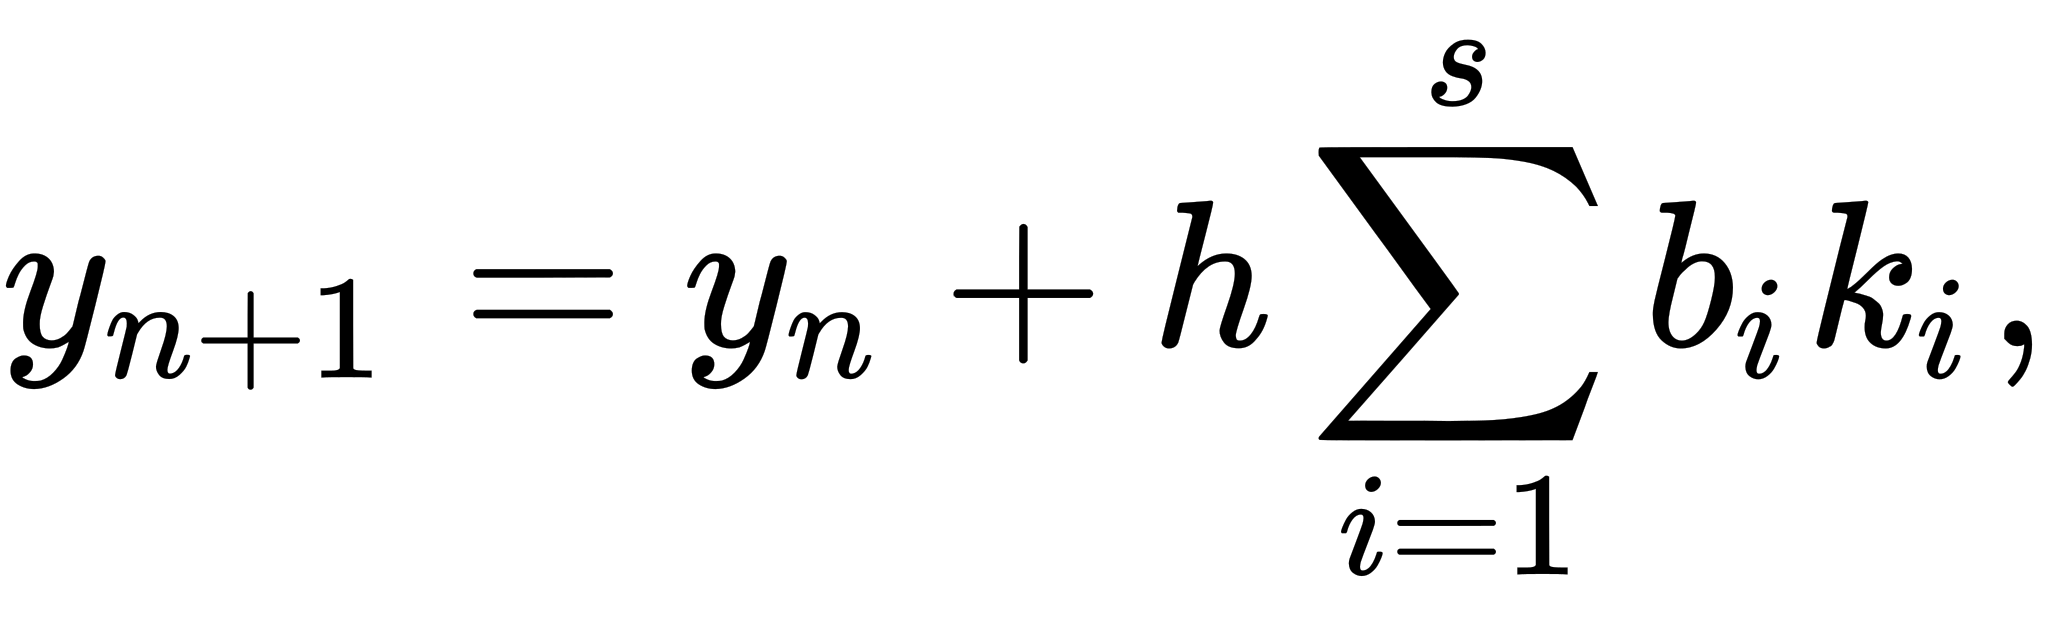

In [20]:
from IPython.core.display import SVG
from IPython.core.display import Image
SVG(filename='1.svg')

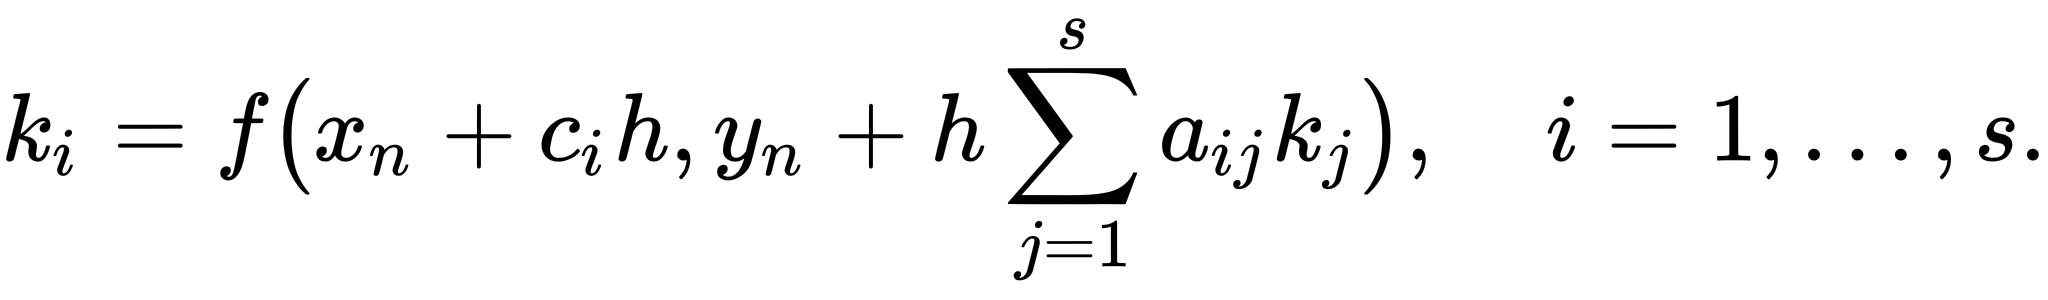

In [21]:
SVG(filename='2.svg')

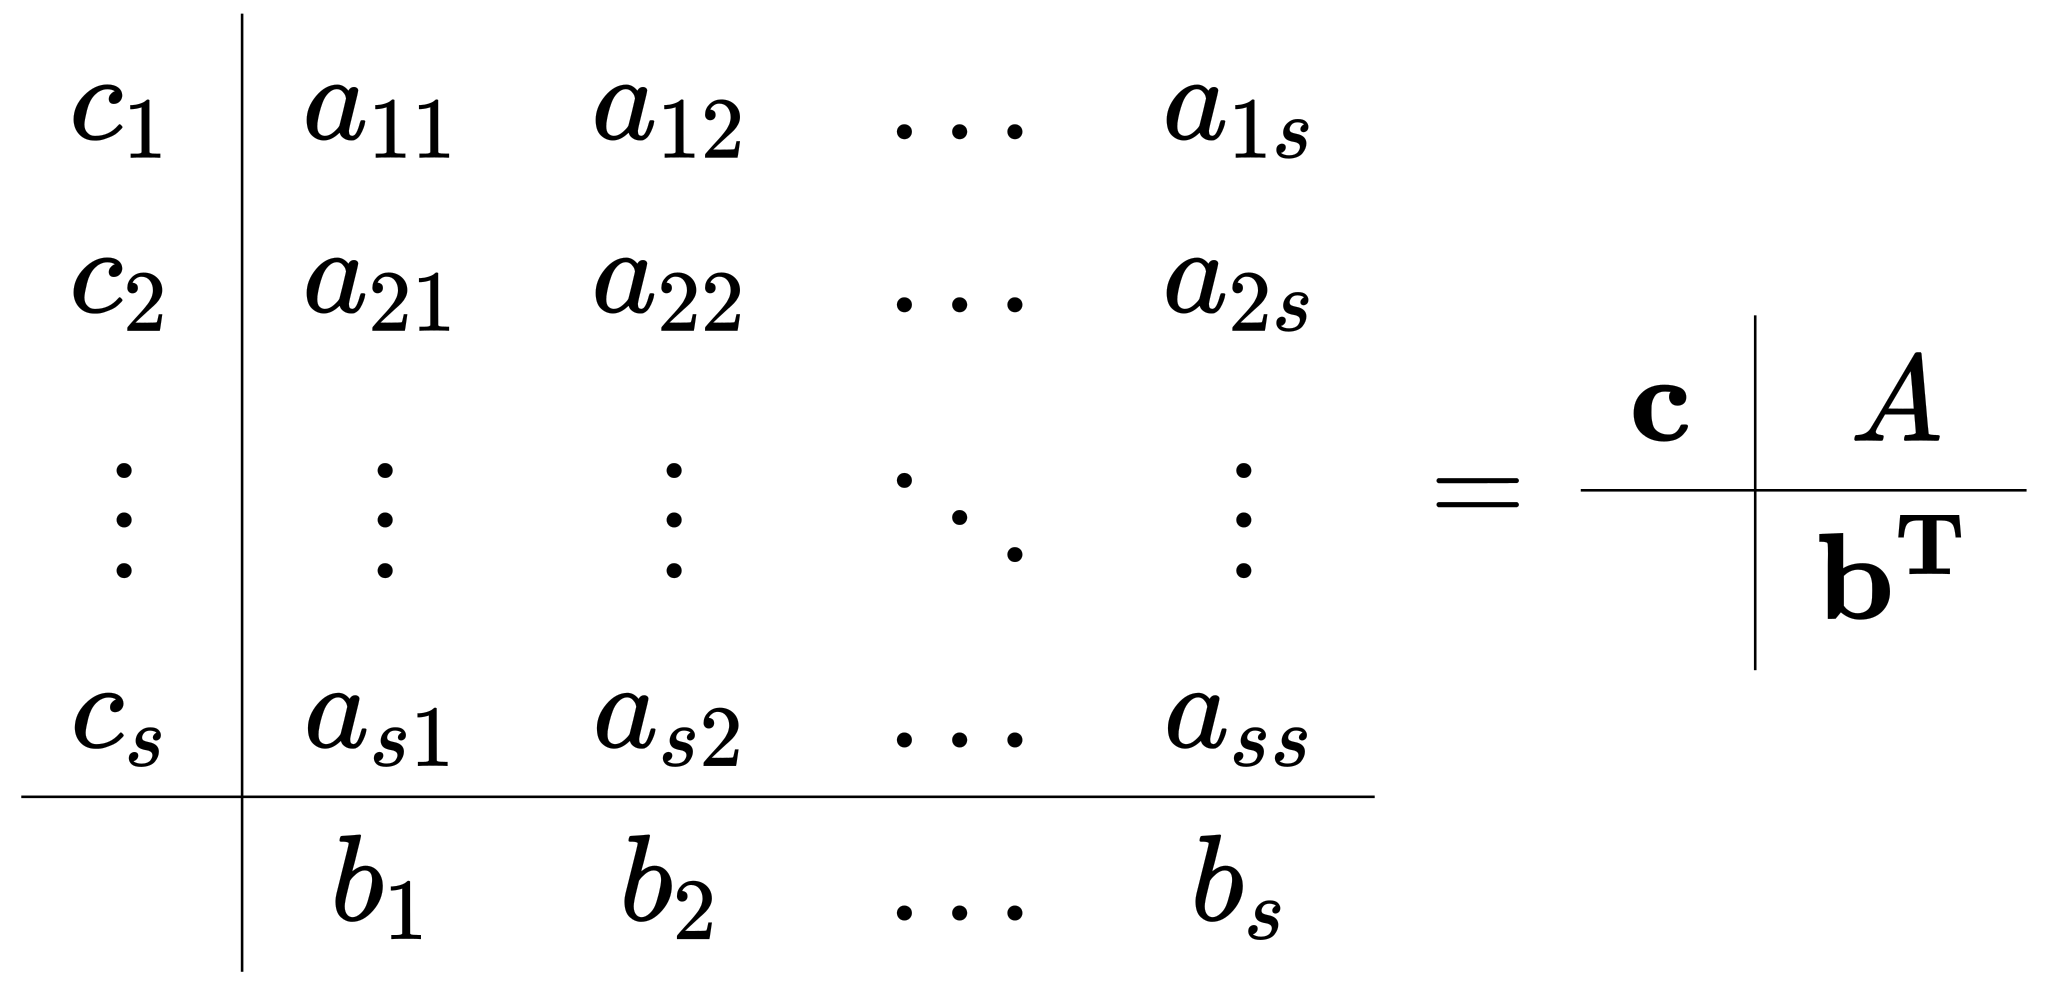

In [22]:
SVG(filename='3.svg')

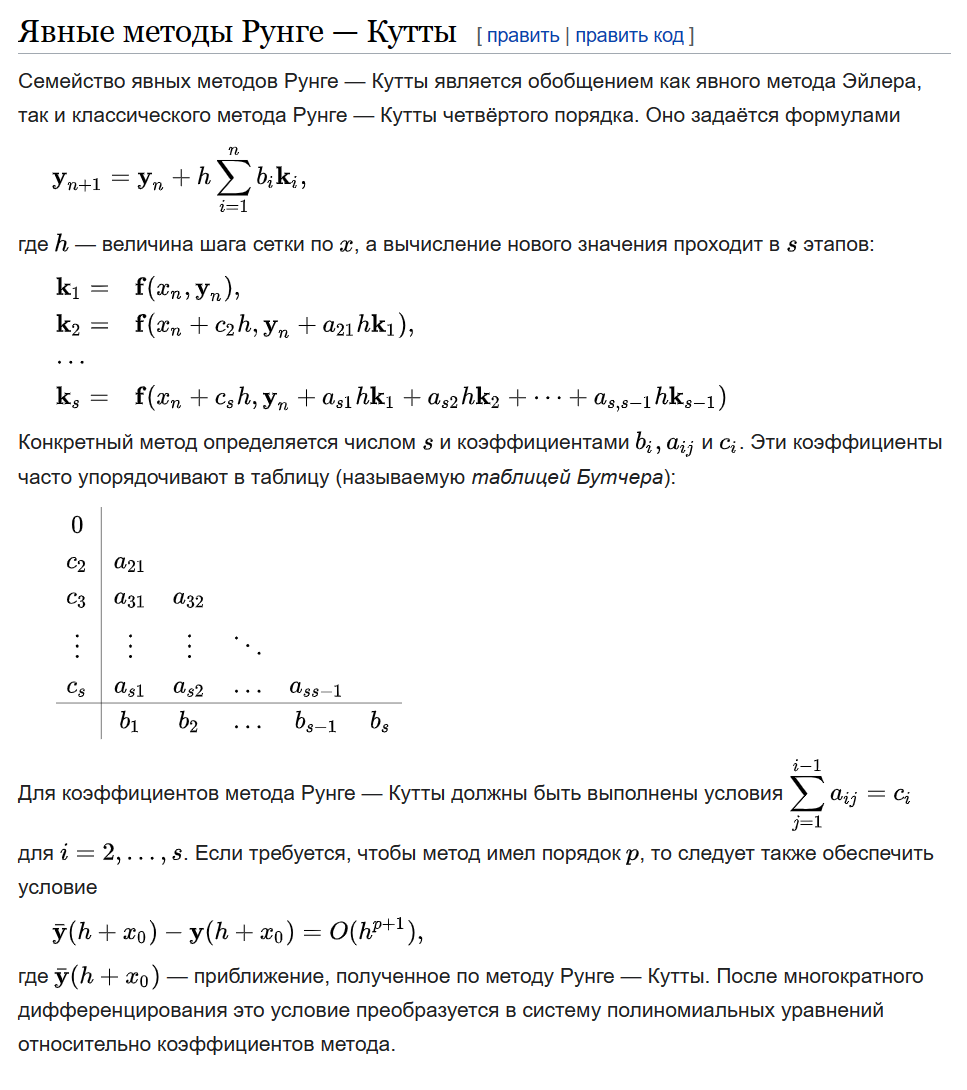

In [23]:
Image('COOL.jpg')

In [24]:
class Butchers_Tableau:
    
    def __init__(self, n):
        self.__c = np.zeros((n, n))
        self.__n = n
        self.__b = np.zeros(n)
        
    def get_len(self):
        return self.__n
        
    def print(self):
        print(self.__c)
        print(self.__b)
    
    def get(self, i, j):
        return self.__c[i, j] 

    def paste(self, c_arr, b_arr):
        self.__c = c_arr 
        self.__b = b_arr
        
    def fulfill(self):
        for i in range(len(self.__c)):
            self.__c[i] = parse_arr(input())  

        print("enter b:")
        self.__b = parse_arr(input())
    
    def get_c(self, i):
        return sum(self.__c[i])

    def get_b(self, num):
        return self.__b[num]

    def get_b_arr(self):
        return self.__b

In [18]:
import numpy as np 

class Perceptron_erk:
    
    def __init__(self, learning_rate, epochs):
        self.weights_A_Layer = None # VESA A to A 
        self.weights_R_Layer = None # vesa A to R
        self.bias = None # СКЛОННОСТЬ К АКТИВАЦИИ 
        self.learning_rate = learning_rate 
        self.epochs = epochs

    def activation(self, z):
        return func(z)*h 
        
    def train(self, X, s = 0):
        self.weights_A_Layer = np.zeros(s)
        self.weights_R_Layer = np.zeros(s)
        #Dobavlyaem vesa i otklonenie(uverennost') neirona
        self.bias = 0
        # Iteriruemsya po kolichestvu epoh
        for epoch in range(self.epochs):
            
            #Teper' iteriruemsya po trenirovachnomy naboru 
            for i in range(len(s)):
                z = X + np.sum(self.weights_A_Layer[i])+self.bias 
                y_pred = self.activation(z)
                
                #Obnovlyaem vesa i uverennost'
                self.weights_l2 = self.weights_l2 + self.learning_rate * (y[i] - y_pred[i]) * X[i]
        return self.weights_l2, self.bias
    
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.activation(z)

In [25]:
import math
def func(x, y):
    return x*y

In [26]:
def my_range(start, end, step):
    while start <= end: 
        yield start
        start +=step

In [27]:
def runge_kutta_explicit(tableau: Butchers_Tableau, x0, y0, xn, h):
    y = y0
    for x in my_range(x0, xn-h, h):
        # for j in range(len(tableau.get_len())):
        k_arr = [func(x, y)]
        for s in range(1, tableau.get_len()):
            y_corr = 0
            for str in range(s):
                y_corr += tableau.get(s, str) * k_arr[str]
            k_arr.append(func(x + tableau.get_c(s)*h, y + h*y_corr))
        k_sum = 0
        for j in range(tableau.get_len()):
            k_sum += tableau.get_b(j) * k_arr[j]
        y = y + h * k_sum
    return y 

In [28]:
# table = Butchers_Tableau(int(input('Введите размерность таблицы: ')))
table = Butchers_Tableau(4) #CHECK UP NO. 1
# table.fulfill() works fine /
table.paste(np.array([[0.0, 0.0,  0.0,  0.0 ],
 [0.5, 0.0, 0.0, 0.0 ],
 [0.0, 0.5, 0.0, 0.0 ],
 [0.0, 0.0,  1.0, 0.0 ]]), 
 np.array([0.16666667, 0.33333333, 0.33333333, 0.16666667]))
table.print()
print(runge_kutta_explicit(table, 0, 1, math.sqrt(2), 0.1))

table_1 = Butchers_Tableau(3) #check up NO. 2
table_1.paste(np.array([[0.0, 0.0,  0.0],
 [0.5, 0.0, 0.0],
 [-1, 2, 0.0]]), 
 np.array([1/6, 4/6, 1/6]))
table_1.print()
print(runge_kutta_explicit(table_1, 0, 1, math.sqrt(2), 0.1))

[[0.  0.  0.  0. ]
 [0.5 0.  0.  0. ]
 [0.  0.5 0.  0. ]
 [0.  0.  1.  0. ]]
[0.16666667 0.33333333 0.33333333 0.16666667]
2.66445350717824
[[ 0.   0.   0. ]
 [ 0.5  0.   0. ]
 [-1.   2.   0. ]]
[0.16666667 0.66666667 0.16666667]
2.664482992386641


In [ ]:
perceptron_erk = Perceptron_erk(0.0001, 100)
perceptron.train(x, 4, y)

In [34]:
from sklearn.datasets import load_iris
iris = load_iris()

from sklearn.model_selection import train_test_split 
X = iris.data[:, (0, 1)] # длинна и ширина лепестка 
y = (iris.target == 0).astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)

In [30]:
x = 
perceptron = Perceptron(0.001, 100)

perceptron.train()

pred = perceptron.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score

accuracy_score(pred, y_test)

0.9733333333333334